In [1]:
# Load the necessary libraries
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load a subset with 1000 instances of the MNIST digits dataset
digits = pd.read_csv('https://static-resources.zybooks.com/MachineLearning/digits.csv')
digits_sample = digits.sample(1500, random_state=1234)

In [3]:
# Subset input and output features
X = digits_sample.iloc[:,:-1]
y = digits_sample[['class']]

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
# Build a pipeline that fits an PCA model to the scaled training data
scaler = MinMaxScaler()
pca = PCA(n_components=2, random_state=123)
pipeline_pca = Pipeline(steps=[('scaler',scaler),('pca',pca)])
X_transformed = pipeline_pca.fit_transform(X_train, np.ravel(y_train))

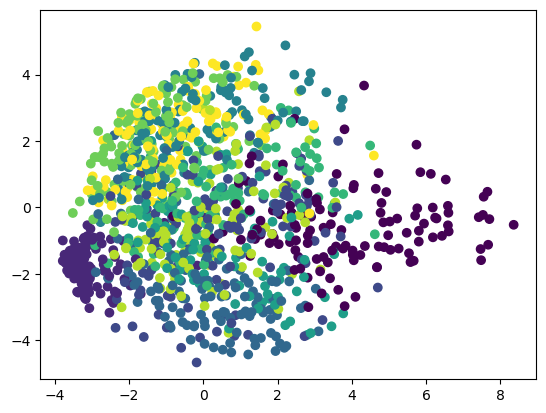

In [6]:
# Plot the PCA mapping
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=np.ravel(y_train), cmap='viridis')

In [7]:
# Build a pipeline that fits a t-SNE model to the scaled training data
tsne = TSNE(n_components=2, perplexity=45.0, random_state=123)
pipeline_tsne = Pipeline(steps=[('scaler',scaler),('tsne',tsne)])
X_transform_tsne = pipeline_tsne.fit_transform(X_train)

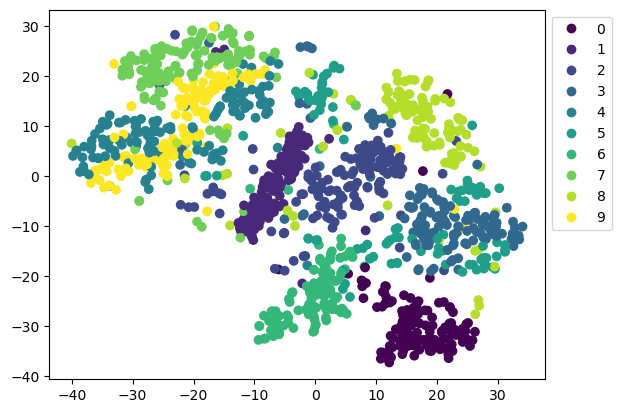

In [8]:
# Plot the t-SNE model mapping
X_transform_tsne = tsne.fit_transform(X_train)
fig, plot = plt.subplots()
plt.prism()
scatter = plot.scatter(X_transform_tsne[:, 0], X_transform_tsne[:, 1], c=np.ravel(y_train), cmap='viridis')
plt.legend(bbox_to_anchor=(1, 1), handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1])

In [9]:
# Display the data points in lower-dimensional space
pd.DataFrame(tsne.embedding_)

,0,1
0,-1.308278,-17.799923
1,-31.981707,10.766246
2,-32.265118,10.752567
3,12.368872,-31.897905
4,12.662299,-34.173542
...,...,...
1195,11.351619,-23.287157
1196,-10.140311,1.368664
1197,-26.946974,0.223503
1198,14.775805,14.303043


In [10]:
# Display the KL divergence after optimization
tsne.kl_divergence_

1.0328541994094849

In [11]:
# Display the effective learning rate
tsne.learning_rate_

50.0